### get data

In [1]:
# import pandas_datareader.data as web # https://pandas-datareader.readthedocs.io/en/latest/remote_data.html
import datetime as dt
import pandas as pd
print(pd.__version__)

1.2.3


In [2]:
import yfinance as yf # https://pypi.org/project/yfinance/ https://aroussi.com/post/python-yahoo-finance
print(yf.__version__)

import matplotlib.pyplot as plt
%matplotlib inline

0.1.59


In [3]:
%autosave 900

Autosaving every 900 seconds


In [4]:
# constants
square = 'SQ'
tesla = 'TSLA'
linde = 'LIN'
microsoft = 'MSFT'
google = 'GOOGL'
sap = 'SAP'

squarev = square + 'v'
teslav = tesla + 'v'
lindev = linde + 'v'
microsoftv = microsoft + 'v'
googlev = google + 'v'
sapv = sap + 'v'

target_stock_tickers = [square, tesla, linde, microsoft, google, sap]
target_stock_volume = [squarev, teslav, lindev, microsoftv, googlev, sapv]
SIZE = len(target_stock_tickers)

FIVE_YEARS = '5y'
FC = 'Forecast'
BT = 'Backtest'

POINT_FIVE = 0.5
FIFTY = 50
TWO_HUNDRED = 200

TEN_BY_FIVE = (10, 5)
SIXTEEN_BY_EIGHT = (16, 8)

In [5]:
def get_ydata(ticker, time):
    obj = yf.Ticker(ticker)
    return obj.history(period = time)

def get_yinfo(ticker):
    obj = yf.Ticker(ticker)
    return obj.info

def get_ypricesv_df(stocks, time):
    first_run = True
    stock_data = None

    for stock in stocks:
        temp = get_ydata(stock, time)

        if first_run:
            stock_data = temp.drop(['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis=1)
            stock_data = stock_data.rename(columns={'Close': stock, 'Volume': stock + 'v'})
            first_run = False
        else:
            stock_data[stock] = temp['Close']
            stock_data[stock + 'v'] = temp['Volume']

    return stock_data

In [6]:
df = get_ypricesv_df(target_stock_tickers, FIVE_YEARS)
df.head()

,SQ,SQv,TSLA,TSLAv,LIN,LINv,MSFT,MSFTv,GOOGL,GOOGLv,SAP,SAPv
Date,,,,,,,,,,,,
2016-04-18,14.51,1384700,50.776001,21357000,104.673485,888300,51.772221,23786000,787.679993,1677000,73.763023,690400
2016-04-19,14.09,2539200,49.473999,31787500,107.107315,1226200,51.708035,29596800,776.250000,2197600,74.962341,1447100
2016-04-20,13.63,4211900,49.993999,25970500,107.530991,1079300,50.974457,36195700,774.919983,1713100,74.887970,1574100
2016-04-21,13.24,2085800,49.658001,13915500,107.134354,573500,51.148682,38909100,780.000000,3881400,74.488197,861100
2016-04-22,13.34,1587100,50.750000,18931500,107.828453,658300,47.480804,126834100,737.770020,7039900,74.562561,891000


### visualize

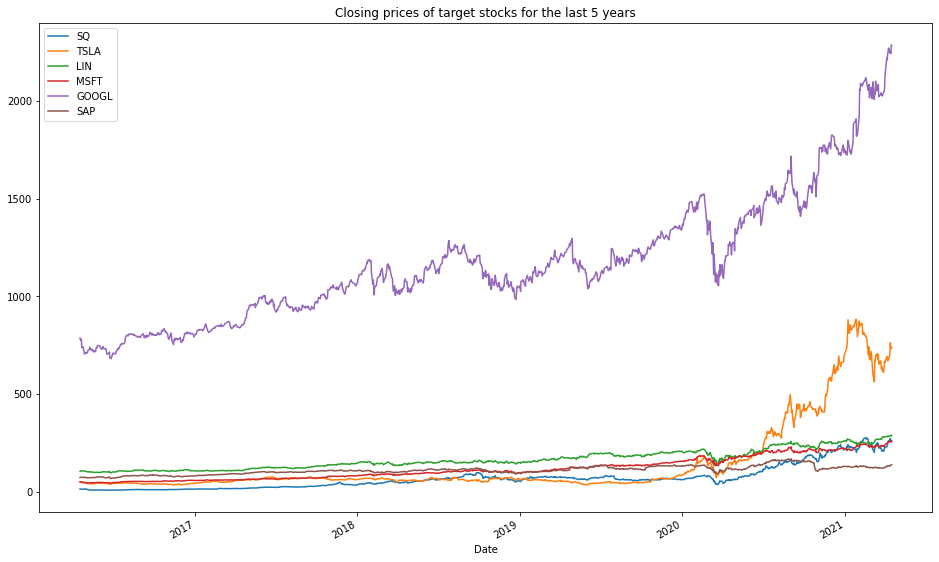

In [7]:
first = True
for stock in target_stock_tickers:
    if first:
        df[stock].plot(label=stock, figsize=(16,10), title='Closing prices of target stocks for the last 5 years')
        first = False
    else:        
        df[stock].plot(label=stock)
    
plt.legend()

# df[square].plot(label=square, figsize=(16,10), title='Closing prices of target stocks for the last 5 years')
# df[tesla].plot(label=tesla)
# df[linde].plot(label=linde)
# df[microsoft].plot(label=microsoft)
# df[google].plot(label=google)
# df[sap].plot(label=sap)
# plt.legend()

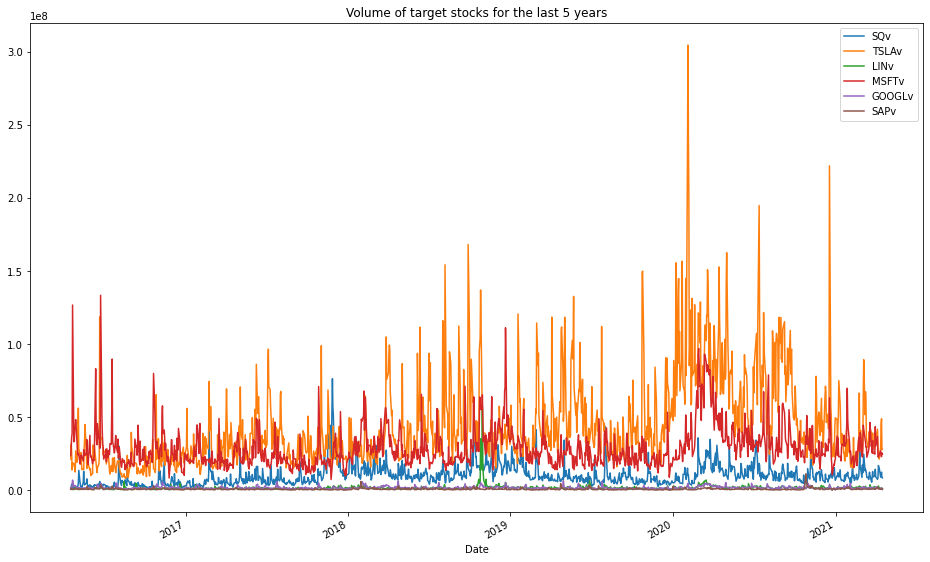

In [8]:
first = True
for vol in target_stock_volume:
    if first:
        df[vol].plot(label=vol, 
                       figsize=(16,10), 
                       title='Volume of target stocks for the last 5 years')
        first = False
    else:        
        df[vol].plot(label=vol)
    
plt.legend()

In [9]:
print(tesla, 'hit high of', df[teslav].max(), 'traded volume on', df[teslav].idxmax())

TSLA hit high of 304694000 traded volume on 2020-02-04 00:00:00


In [10]:
dfdiff = df.diff()
dfdiff.head()

,SQ,SQv,TSLA,TSLAv,LIN,LINv,MSFT,MSFTv,GOOGL,GOOGLv,SAP,SAPv
Date,,,,,,,,,,,,
2016-04-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-19,-0.42,1154500.0,-1.302002,10430500.0,2.433830,337900.0,-0.064186,5810800.0,-11.429993,520600.0,1.199318,756700.0
2016-04-20,-0.46,1672700.0,0.520000,-5817000.0,0.423676,-146900.0,-0.733578,6598900.0,-1.330017,-484500.0,-0.074371,127000.0
2016-04-21,-0.39,-2126100.0,-0.335999,-12055000.0,-0.396637,-505800.0,0.174225,2713400.0,5.080017,2168300.0,-0.399773,-713000.0
2016-04-22,0.10,-498700.0,1.091999,5016000.0,0.694099,84800.0,-3.667877,87925000.0,-42.229980,3158500.0,0.074364,29900.0


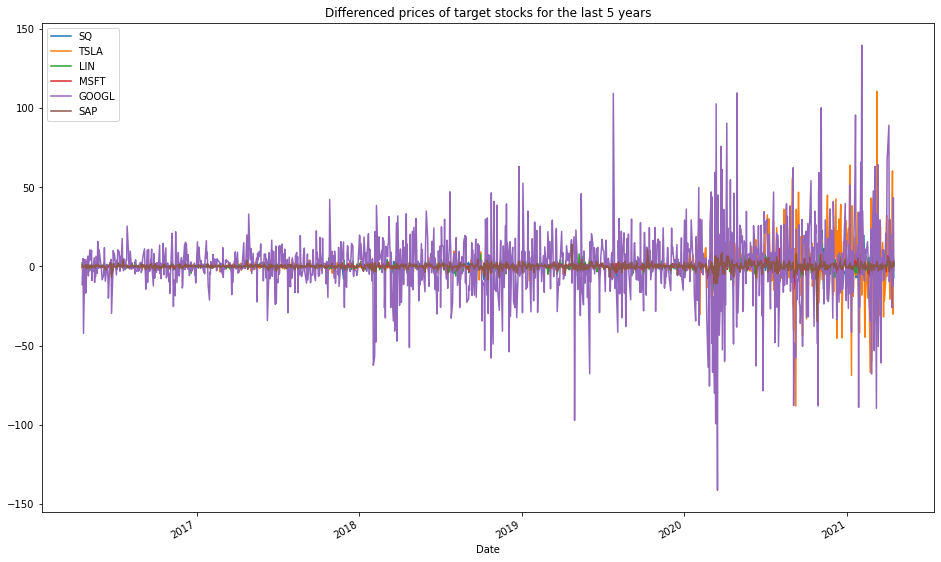

In [11]:
first = True
for stock in target_stock_tickers:
    if first:
        dfdiff[stock].plot(label=stock, 
                       figsize=(16,10), 
                       title='Differenced prices of target stocks for the last 5 years')
        first = False
    else:        
        dfdiff[stock].plot(label=stock)
    
plt.legend()

# df_diff[square].plot(label=square, figsize=(16,10), title='Differenced prices of target stocks for the last 5 years')
# df_diff[tesla].plot(label=tesla)
# df_diff[linde].plot(label=linde)
# df_diff[microsoft].plot(label=microsoft)
# df_diff[google].plot(label=google)
# df_diff[sap].plot(label=sap)
# plt.legend()

In [12]:
from pandas.plotting import scatter_matrix

In [13]:
dfclose = df[[square, tesla, linde, microsoft, google, sap]].copy()
# dfclose[tesla] = df[tesla] #, df[linde], df[microsoft], df[google], df[sap]])
dfclose.head()

,SQ,TSLA,LIN,MSFT,GOOGL,SAP
Date,,,,,,
2016-04-18,14.51,50.776001,104.673485,51.772221,787.679993,73.763023
2016-04-19,14.09,49.473999,107.107315,51.708035,776.250000,74.962341
2016-04-20,13.63,49.993999,107.530991,50.974457,774.919983,74.887970
2016-04-21,13.24,49.658001,107.134354,51.148682,780.000000,74.488197
2016-04-22,13.34,50.750000,107.828453,47.480804,737.770020,74.562561


/home/leoroi/.local/share/virtualenvs/pipenvJupyter-syI1KNz6/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


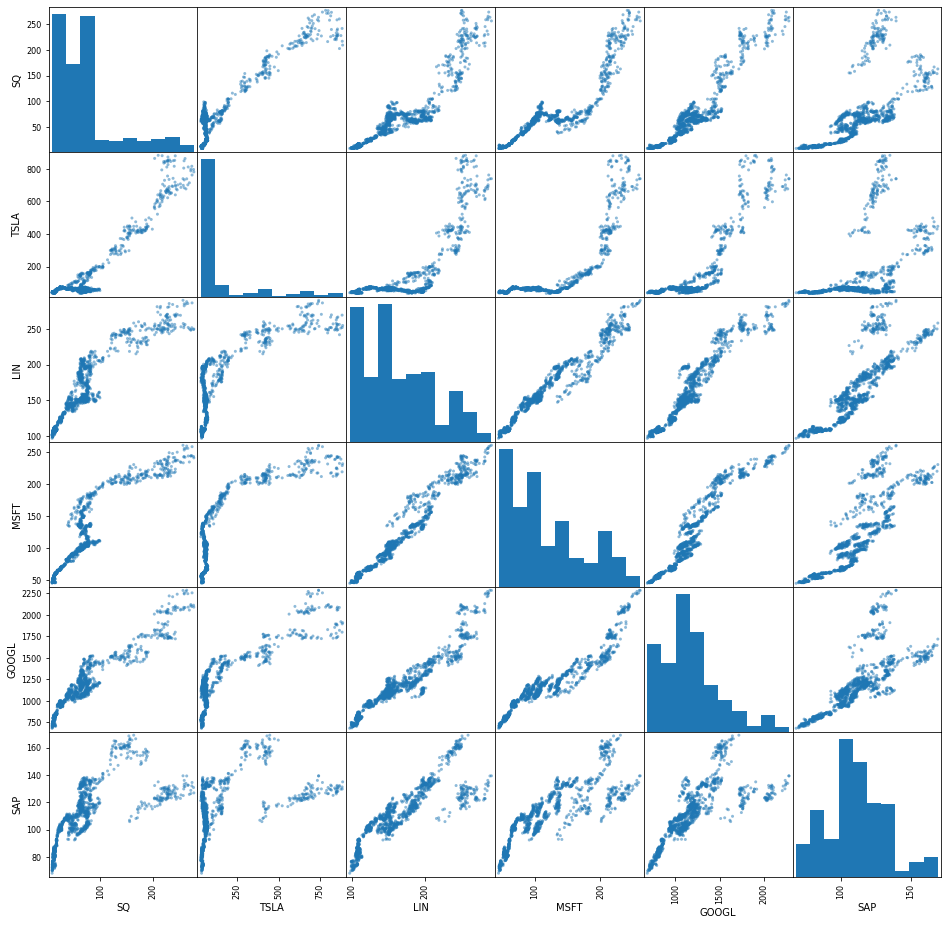

In [14]:
scatter_matrix(dfclose, figsize=(16, 16));

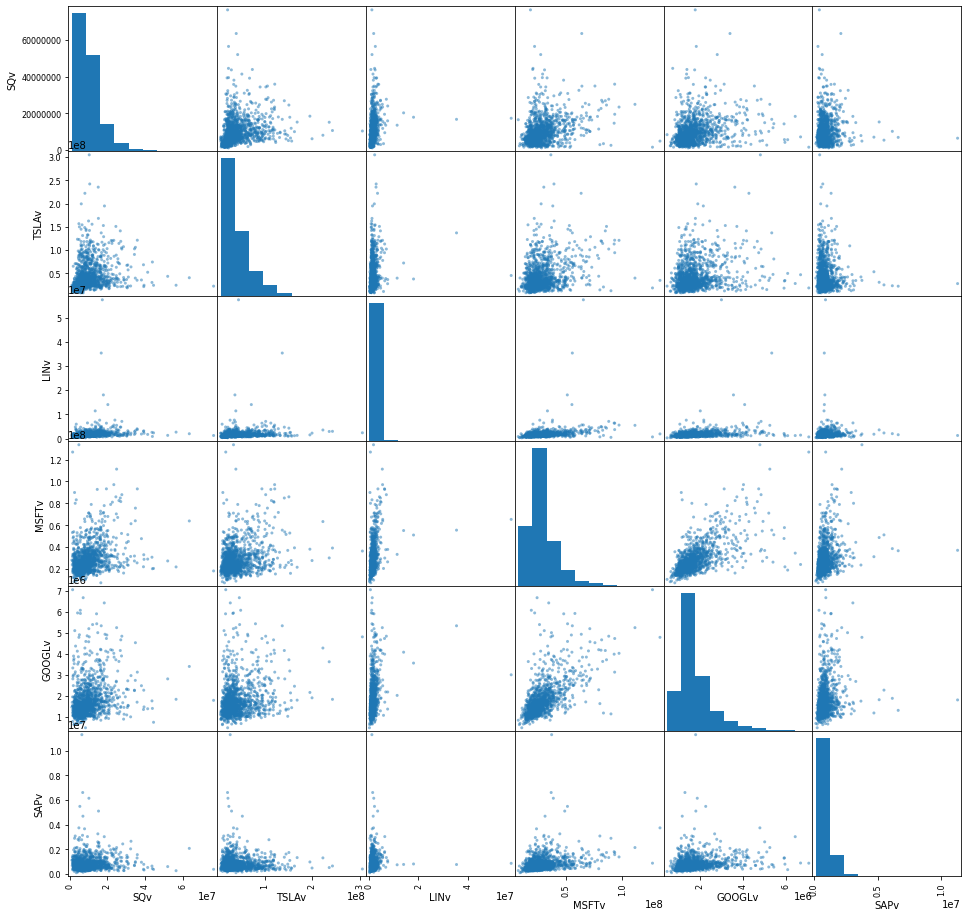

In [15]:
dfvolume = df[[squarev, teslav, lindev, microsoftv, googlev, sapv]].copy()
scatter_matrix(dfvolume, figsize=(16, 16));

In [16]:
df.head()

,SQ,SQv,TSLA,TSLAv,LIN,LINv,MSFT,MSFTv,GOOGL,GOOGLv,SAP,SAPv
Date,,,,,,,,,,,,
2016-04-18,14.51,1384700,50.776001,21357000,104.673485,888300,51.772221,23786000,787.679993,1677000,73.763023,690400
2016-04-19,14.09,2539200,49.473999,31787500,107.107315,1226200,51.708035,29596800,776.250000,2197600,74.962341,1447100
2016-04-20,13.63,4211900,49.993999,25970500,107.530991,1079300,50.974457,36195700,774.919983,1713100,74.887970,1574100
2016-04-21,13.24,2085800,49.658001,13915500,107.134354,573500,51.148682,38909100,780.000000,3881400,74.488197,861100
2016-04-22,13.34,1587100,50.750000,18931500,107.828453,658300,47.480804,126834100,737.770020,7039900,74.562561,891000


In [17]:
# returns
df[square + 'r'] = df[square].pct_change(1)
dfreturns = df[[square + 'r']].copy()
dfreturns = dfreturns.rename(columns={square + 'r': square})

dfreturns[tesla] = df[tesla].pct_change(1)

dfreturns[linde] = df[linde].pct_change(1)
dfreturns[microsoft] = df[microsoft].pct_change(1)

dfreturns[google] = df[google].pct_change(1)
dfreturns[sap] = df[sap].pct_change(1)

dfreturns.head()

,SQ,TSLA,LIN,MSFT,GOOGL,SAP
Date,,,,,,
2016-04-18,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-19,-0.028946,-0.025642,0.023252,-0.001240,-0.014511,0.016259
2016-04-20,-0.032647,0.010511,0.003956,-0.014187,-0.001713,-0.000992
2016-04-21,-0.028613,-0.006721,-0.003689,0.003418,0.006556,-0.005338
2016-04-22,0.007553,0.021990,0.006479,-0.071710,-0.054141,0.000998


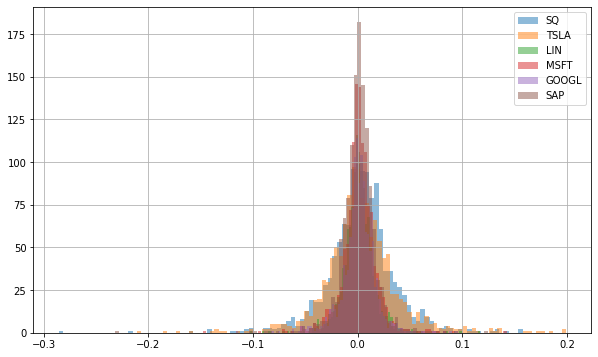

In [18]:
dfreturns[square].hist(bins=100, label=square, alpha=POINT_FIVE, figsize=(10, 6))
dfreturns[tesla].hist(bins=100, label=tesla, alpha=POINT_FIVE)
dfreturns[linde].hist(bins=100, label=linde, alpha=POINT_FIVE)
dfreturns[microsoft].hist(bins=100, label=microsoft, alpha=POINT_FIVE)
dfreturns[google].hist(bins=100, label=google, alpha=POINT_FIVE)
dfreturns[sap].hist(bins=100, label=sap, alpha=POINT_FIVE)
plt.legend()

<AxesSubplot:>

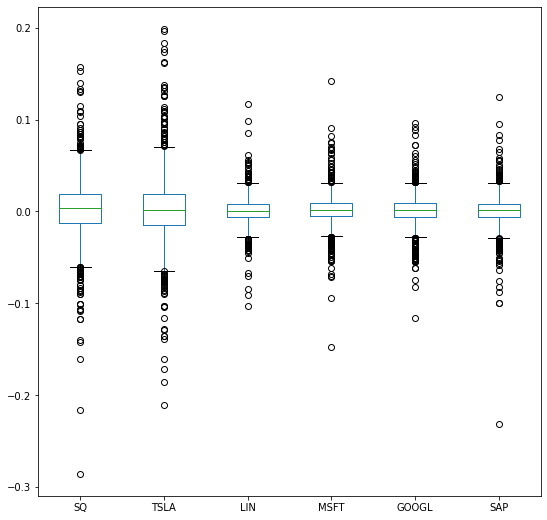

In [19]:
dfreturns.plot(kind='box', figsize=(9,9))

/home/leoroi/.local/share/virtualenvs/pipenvJupyter-syI1KNz6/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


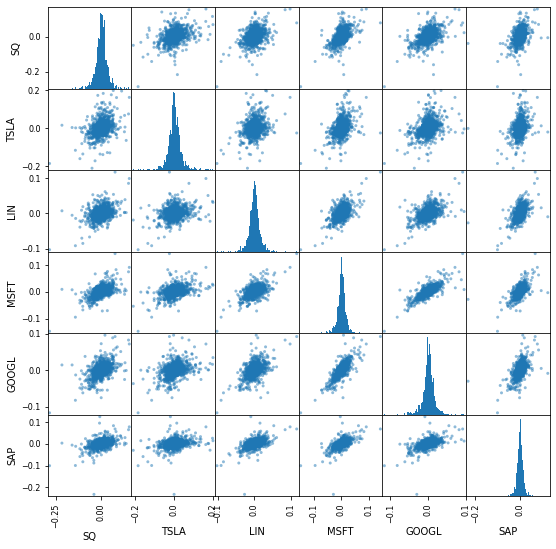

In [20]:
scatter_matrix(dfreturns, figsize=(9,9), hist_kwds={'bins':100});

In [21]:
# cumulative returns
dfreturns_cumulative = pd.DataFrame(index=dfreturns.index.copy())

dfreturns_cumulative[square] = (1 + dfreturns[square]).cumprod()
dfreturns_cumulative[tesla] = (1 + dfreturns[tesla]).cumprod()

dfreturns_cumulative[linde] = (1 + dfreturns[linde]).cumprod()
dfreturns_cumulative[microsoft] = (1 + dfreturns[microsoft]).cumprod()

dfreturns_cumulative[google] = (1 + dfreturns[google]).cumprod()
dfreturns_cumulative[sap] = (1 + dfreturns[sap]).cumprod()

dfreturns_cumulative.tail()

,SQ,TSLA,LIN,MSFT,GOOGL,SAP
Date,,,,,,
2021-04-12,18.277051,13.825035,2.726861,4.942998,2.849660,1.794937
2021-04-13,18.830462,15.013392,2.735077,4.992832,2.862114,1.822458
2021-04-14,17.808407,14.420789,2.723230,4.936817,2.846219,1.843336
2021-04-15,18.130943,14.551165,2.751127,5.012341,2.901242,1.887124
2021-04-16,17.649897,14.569482,2.770138,5.036291,2.898068,1.888480


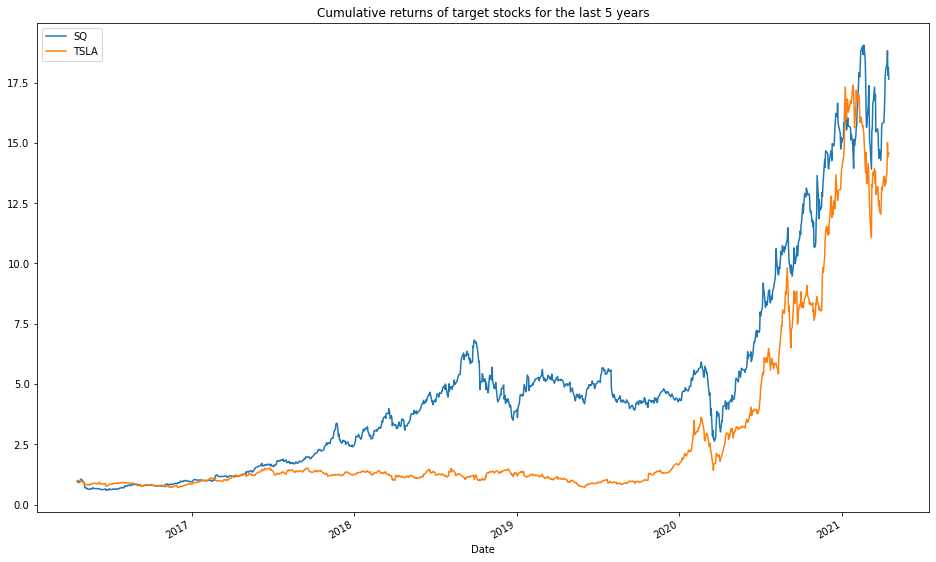

In [22]:
dfreturns_cumulative[square].plot(label=square, figsize=(16,10), title='Cumulative returns of target stocks for the last 5 years')
dfreturns_cumulative[tesla].plot(label=tesla)
plt.legend()

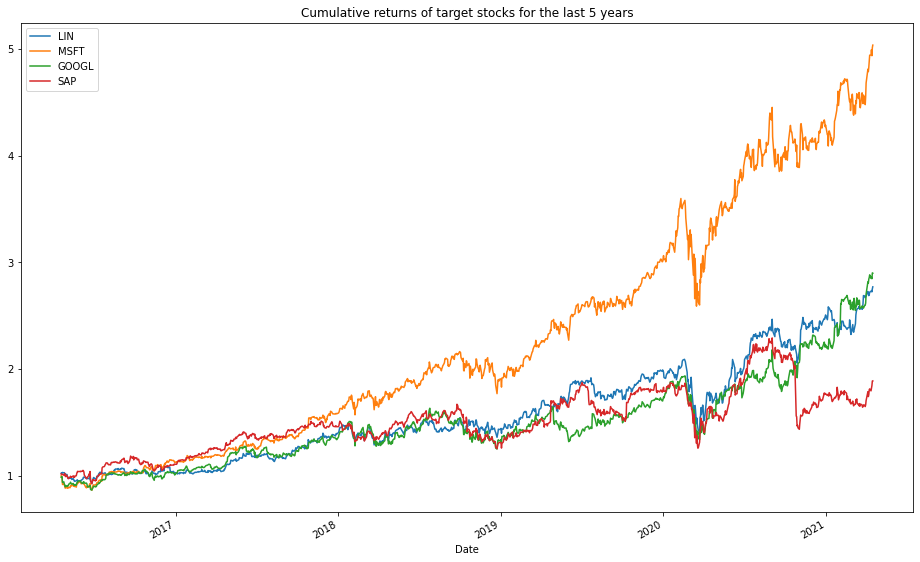

In [23]:
dfreturns_cumulative[linde].plot(label=linde, figsize=(16,10), title='Cumulative returns of target stocks for the last 5 years')
dfreturns_cumulative[microsoft].plot(label=microsoft)
dfreturns_cumulative[google].plot(label=google)
dfreturns_cumulative[sap].plot(label=sap)
plt.legend()

<AxesSubplot:xlabel='Date'>

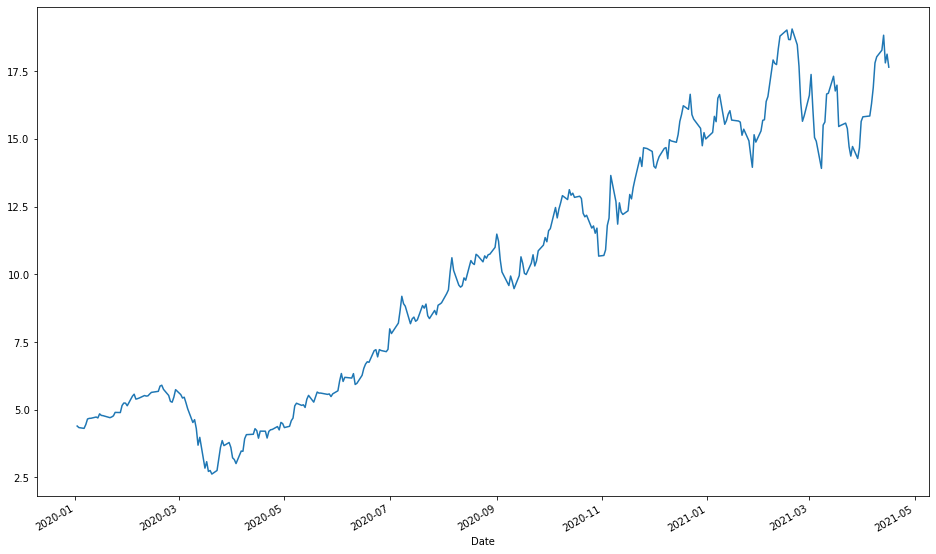

In [24]:
dfreturns_cumulative[square]['2020-01-01':].plot(label=square, figsize=(16,10))

### statsmodels

In [25]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [127]:
sqdf = pd.DataFrame(df[square]) # avoid auto boxing into series

sqdf.index = pd.DatetimeIndex(sqdf.index).to_period('B') 
# set index frequency to daily business, as it was string

print(sqdf.head())
print(sqdf.index)
sqdf.describe().T # same as transpose()

               SQ
Date             
2016-04-18  14.51
2016-04-19  14.09
2016-04-20  13.63
2016-04-21  13.24
2016-04-22  13.34
PeriodIndex(['2016-04-18', '2016-04-19', '2016-04-20', '2016-04-21',
             '2016-04-22', '2016-04-25', '2016-04-26', '2016-04-27',
             '2016-04-28', '2016-04-29',
             ...
             '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
             '2021-04-09', '2021-04-12', '2021-04-13', '2021-04-14',
             '2021-04-15', '2021-04-16'],
            dtype='period[B]', name='Date', length=1259, freq='B')


,count,mean,std,min,25%,50%,75%,max
SQ,1259.0,70.523288,60.864938,8.62,24.83,61.84,77.344997,276.570007


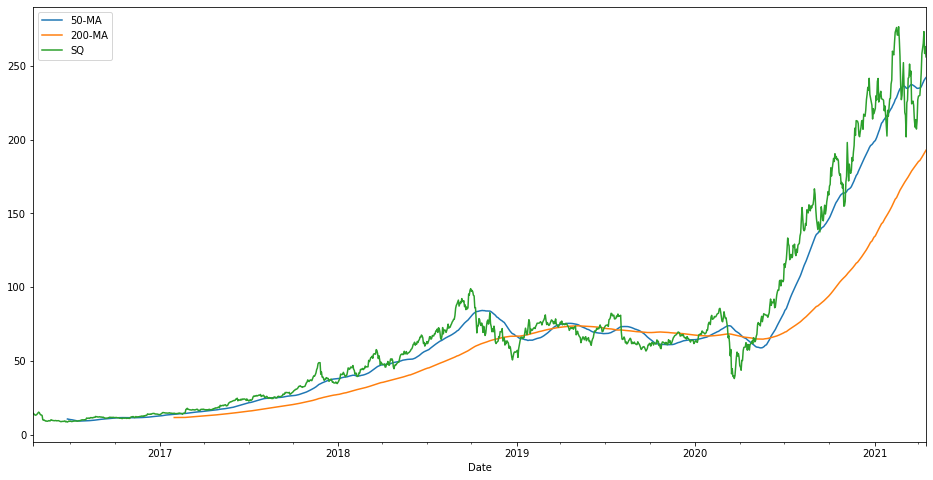

In [128]:
ma50 = sqdf[square].rolling(FIFTY).mean()
ma200 = sqdf[square].rolling(TWO_HUNDRED).mean()

ma50.plot(label='50-MA', figsize=(16,8))
ma200.plot(label='200-MA')

sqdf[square].plot(label=square)
plt.legend()

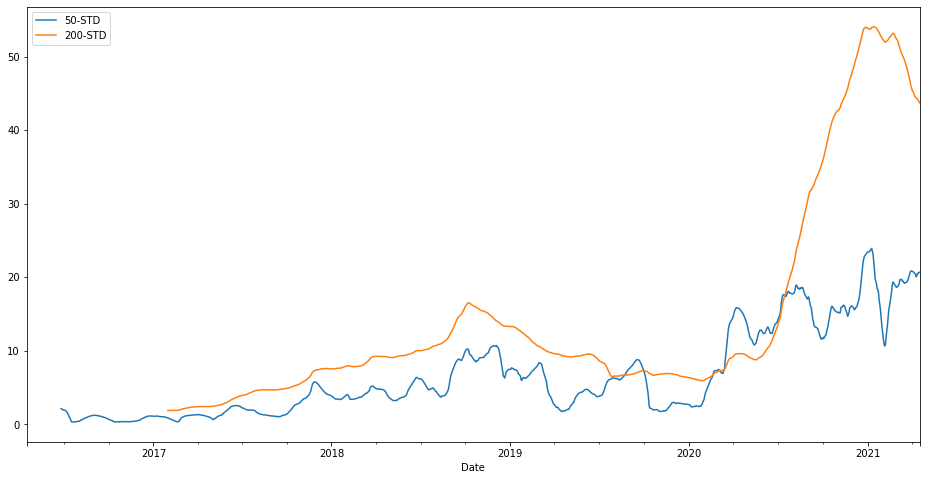

In [129]:
std50 = sqdf[square].rolling(FIFTY).std()
std200 = sqdf[square].rolling(TWO_HUNDRED).std()

std50.plot(label='50-STD', figsize=(16, 8))
std200.plot(label='200-STD')
plt.legend()

In [130]:
sqdf.index

PeriodIndex(['2016-04-18', '2016-04-19', '2016-04-20', '2016-04-21',
             '2016-04-22', '2016-04-25', '2016-04-26', '2016-04-27',
             '2016-04-28', '2016-04-29',
             ...
             '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
             '2021-04-09', '2021-04-12', '2021-04-13', '2021-04-14',
             '2021-04-15', '2021-04-16'],
            dtype='period[B]', name='Date', length=1259, freq='B')

In [134]:
sqdecomp = seasonal_decompose(sqdf[square])
# sqdecomp_fig = sqdecomp.plot()
# sqdecomp_fig.set_size_inches(SIXTEEN_BY_EIGHT)

TypeError: PeriodIndex given. Check the `freq` attribute instead of using infer_freq.

In [135]:
# stationarity
from statsmodels.tsa.stattools import adfuller

def adfuller_check(ts):
    res = adfuller(ts)
    print('Augmented Dicky-Fuller test:')
    labels = ['ADS test statistic', 'p-value', '# of lags', '# of observations']
    
    for value, label in zip(res, labels):
        print('\t' + label + ': ' + str(value))
        
    if res[1] <= 0.05:
        print('>> data has no unit root and is therefore stationary')
    else:
        print('>> failed to reject null hypothesis (ts not stationary)')

In [136]:
adfuller_check(sqdf)

Augmented Dicky-Fuller test:
	ADS test statistic: 1.912231516867537
	p-value: 0.9985474456728964
	# of lags: 23
	# of observations: 1235
>> failed to reject null hypothesis (ts not stationary)


Augmented Dicky-Fuller test:
	ADS test statistic: -7.896567492387419
	p-value: 4.295146328525843e-12
	# of lags: 22
	# of observations: 1235
>> data has no unit root and is therefore stationary


<AxesSubplot:xlabel='Date'>

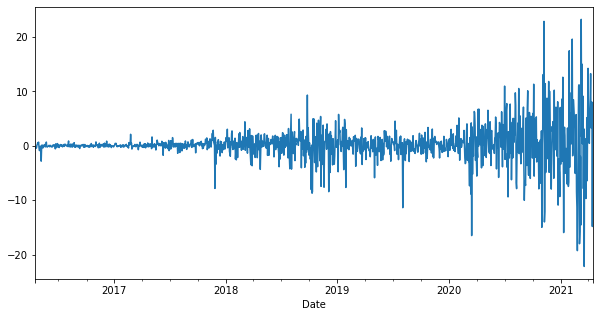

In [137]:
sqdf['diff1'] = sqdf.diff()
adfuller_check(sqdf['diff1'].dropna()) # first value missing
sqdf['diff1'].plot()

Augmented Dicky-Fuller test:
	ADS test statistic: -12.96537415360088
	p-value: 3.1616460829819944e-24
	# of lags: 21
	# of observations: 1235
>> data has no unit root and is therefore stationary


<AxesSubplot:xlabel='Date'>

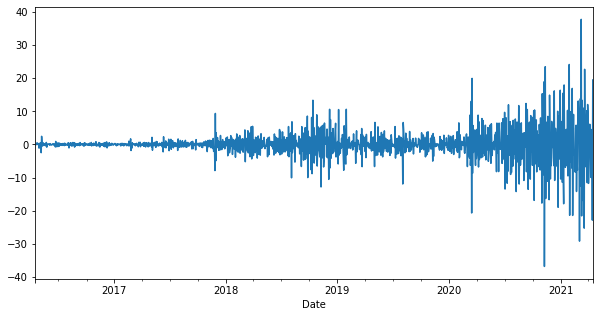

In [138]:
sqdf['diff2'] = sqdf['diff1'].diff()
adfuller_check(sqdf['diff2'].dropna())
sqdf['diff2'].plot()

In [139]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

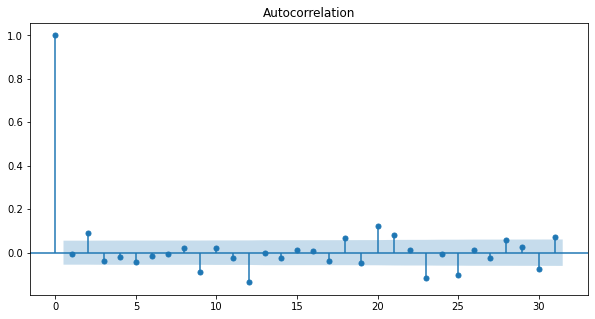

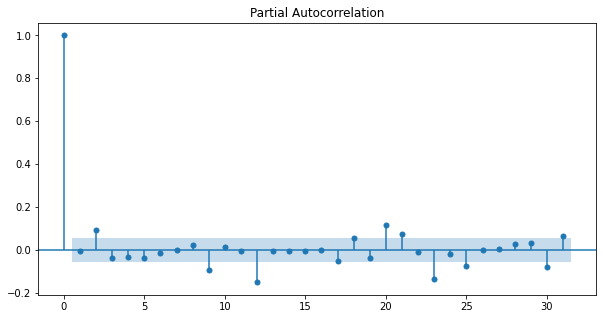

In [140]:
plt.rc("figure", figsize = TEN_BY_FIVE)
acffig = plot_acf(sqdf['diff1'].dropna())
pacffig = plot_pacf(sqdf['diff1'].dropna())

In [141]:
model = sm.tsa.statespace.SARIMAX(sqdf[square], order=(1,1,1))

In [142]:
res = model.fit()

In [143]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     SQ   No. Observations:                 1259
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -3321.322
Date:                Sat, 17 Apr 2021   AIC                           6648.644
Time:                        19:19:34   BIC                           6664.056
Sample:                    04-18-2016   HQIC                          6654.436
                         - 04-16-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9535      0.026    -36.595      0.000      -1.005      -0.902
ma.L1          0.9302      0.031     29.808      0.000       0.869       0.991
sigma2        11.5010      0.188     61.174      0.000      11.132      11.869
===================================================================================
Ljung-Box (L1) (Q):                   0.68   Jarque-Bera (JB):              5914.47
Prob(Q):                              0.41   Prob(JB):                         0.00
Heteroskedasticity (H):              69.02   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/home/leoroi/.local/share/virtualenvs/pipenvJupyter-syI1KNz6/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


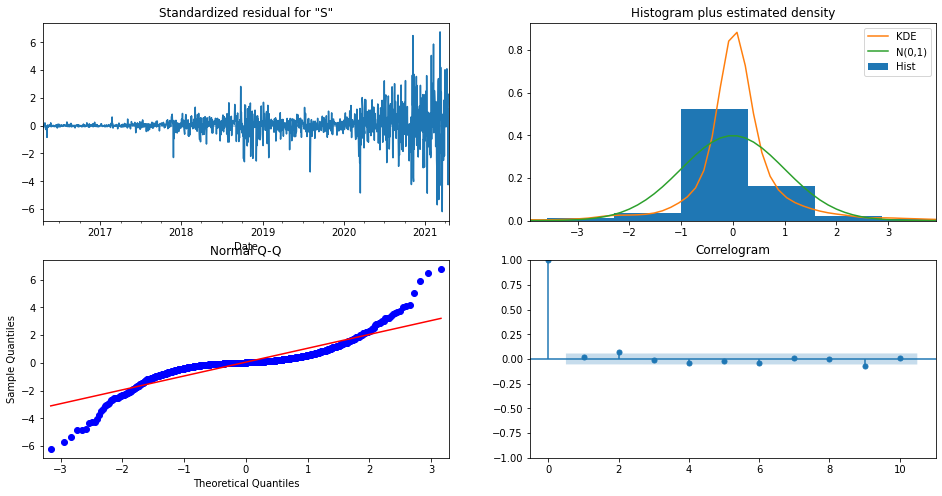

In [144]:
fig1 = res.plot_diagnostics(figsize=SIXTEEN_BY_EIGHT)

<AxesSubplot:xlabel='Date'>

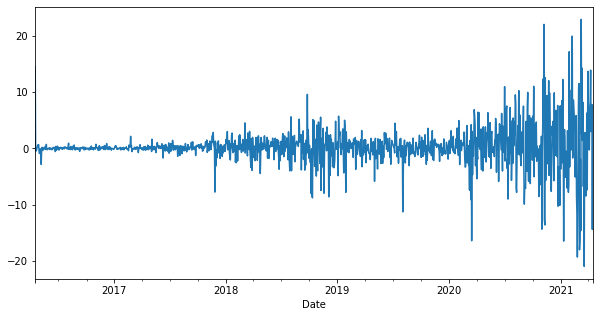

In [145]:
res.resid.plot()

<AxesSubplot:ylabel='Density'>

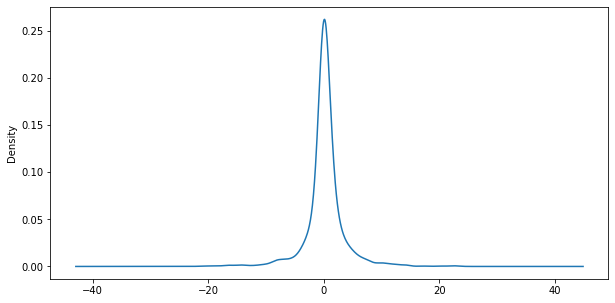

In [146]:
res.resid.plot(kind='kde')

In [147]:
sqdf[BT] = res.predict(start='2021-03-01', end='2021-04-16')
print(sqdf[BT].mean())
sqdf.tail()

234.4774159702088


,SQ,diff1,diff2,Backtest
Date,,,,
2021-04-12,265.200012,3.550018,0.270020,261.296420
2021-04-13,273.230011,8.029999,4.479980,265.446212
2021-04-14,258.399994,-14.830017,-22.860016,272.813910
2021-04-15,263.079987,4.679993,19.510010,259.132566
2021-04-16,256.100006,-6.979980,-11.659973,262.289492


<AxesSubplot:xlabel='Date'>

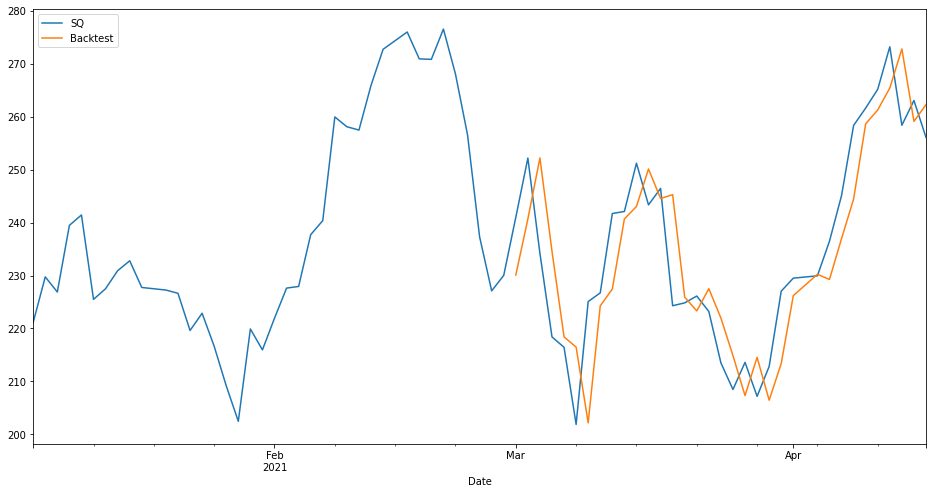

In [148]:
sqdf[[square, BT]]['2021-01-01':].plot(figsize = SIXTEEN_BY_EIGHT)

In [171]:
pp = res.get_forecast(steps='2021-04-30')
pp.predicted_mean

2021-02-12    256.997965
2021-02-15    256.141735
2021-02-16    256.958176
2021-02-17    256.179675
2021-02-18    256.921999
2021-02-19    256.214171
2021-02-22    256.889106
2021-02-23    256.245536
2021-02-24    256.859199
2021-02-25    256.274053
2021-02-26    256.832007
2021-03-01    256.299981
2021-03-02    256.807283
2021-03-03    256.323556
2021-03-04    256.784804
2021-03-05    256.344990
2021-03-08    256.764366
2021-03-09    256.364479
2021-03-10    256.745783
2021-03-11    256.382198
2021-03-12    256.728887
2021-03-15    256.398309
2021-03-16    256.713525
2021-03-17    256.412957
2021-03-18    256.699557
2021-03-19    256.426275
2021-03-22    256.686858
2021-03-23    256.438385
2021-03-24    256.675311
2021-03-25    256.449395
2021-03-26    256.664813
2021-03-29    256.459405
2021-03-30    256.655267
2021-03-31    256.468507
2021-04-01    256.646589
2021-04-02    256.476783
2021-04-05    256.638698
2021-04-06    256.484307
2021-04-07    256.631523
2021-04-08    256.491148


In [165]:
sqdf['2021-02-09':'2021-02-20']

,SQ,diff1,diff2,Backtest
Date,,,,
2021-02-09,258.119995,-1.850006,-21.440002,NaN
2021-02-10,257.489990,-0.630005,1.220001,NaN
2021-02-11,265.929993,8.440002,9.070007,NaN
2021-02-12,272.750000,6.820007,-1.619995,NaN
2021-02-16,276.019989,3.269989,-3.550018,NaN
2021-02-17,270.940002,-5.079987,-8.349976,NaN
2021-02-18,270.850006,-0.089996,4.989990,NaN
2021-02-19,276.570007,5.720001,5.809998,NaN
2021-02-22,268.079987,-8.490021,-14.210022,NaN


In [151]:
sqdf.loc['2019-04-28']

SQ          72.720001
diff1        1.169998
diff2        2.269997
Backtest          NaN
Name: 2019-04-29, dtype: float64

In [152]:
# from pandas.tseries.offsets import DateOffset
import datetime as dt

In [153]:
sqdf.index[-1]

Period('2021-04-16', 'B')

In [154]:
# extend index
extended_index = pd.date_range(start=dt.date(2021, 4, 13), end=dt.date(2021, 4, 30), freq='D')
extended_index = pd.DatetimeIndex(extended_index).to_period('D')
extended_index

PeriodIndex(['2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
             '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20',
             '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
             '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
             '2021-04-29', '2021-04-30'],
            dtype='period[D]', freq='D')

In [155]:
extended_sqdf = pd.DataFrame(index=extended_index, columns = sqdf.columns)
extended_sqdf.head()

,SQ,diff1,diff2,Backtest
2021-04-13,NaN,NaN,NaN,NaN
2021-04-14,NaN,NaN,NaN,NaN
2021-04-15,NaN,NaN,NaN,NaN
2021-04-16,NaN,NaN,NaN,NaN
2021-04-17,NaN,NaN,NaN,NaN


In [156]:
extended_sqdf.index

PeriodIndex(['2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
             '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20',
             '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
             '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
             '2021-04-29', '2021-04-30'],
            dtype='period[D]', freq='D')

In [157]:
sqdf2 = pd.concat([sqdf, extended_sqdf])
sqdf2.index
# sqdf2.head()

Index([2016-04-18, 2016-04-19, 2016-04-20, 2016-04-21, 2016-04-22, 2016-04-25,
       2016-04-26, 2016-04-27, 2016-04-28, 2016-04-29,
       ...
       2021-04-21, 2021-04-22, 2021-04-23, 2021-04-24, 2021-04-25, 2021-04-26,
       2021-04-27, 2021-04-28, 2021-04-29, 2021-04-30],
      dtype='object', length=1277)

In [158]:
sqdf2[FC] = res.predict(start='2021-03-01', end='2021-04-30')
print(sqdf2[FC].mean())
sqdf2.tail()

247.62924667550635


,SQ,diff1,diff2,Backtest,Forecast
2021-04-26,NaN,NaN,NaN,NaN,NaN
2021-04-27,NaN,NaN,NaN,NaN,NaN
2021-04-28,NaN,NaN,NaN,NaN,NaN
2021-04-29,NaN,NaN,NaN,NaN,NaN
2021-04-30,NaN,NaN,NaN,NaN,NaN


In [159]:
sqdf2.describe().T

,count,mean,std,min,25%,50%,75%,max
SQ,1259.0,70.523288,60.864938,8.620000,24.830000,61.840000,77.344997,276.570007
diff1,1258.0,0.192043,3.396455,-22.169998,-0.529999,0.100000,1.027500,23.220001
diff2,1257.0,-0.005219,4.814077,-36.850006,-1.229996,0.000000,1.130005,37.790009
Backtest,34.0,234.477416,18.434511,202.170224,222.316331,230.163919,245.102297,272.813910
Forecast,76.0,247.629247,15.989377,202.170224,240.694117,256.432330,256.690033,272.813910


In [160]:
sqdf2.index[-1]

Period('2021-04-30', 'D')

<AxesSubplot:>

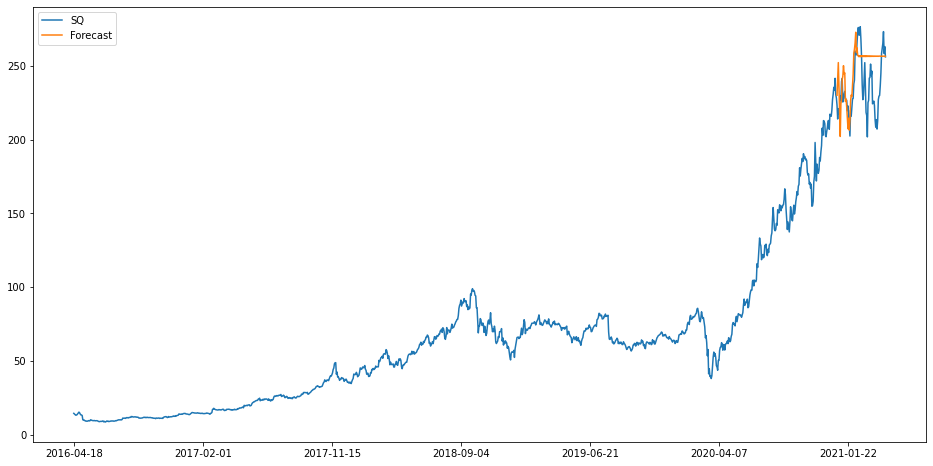

In [161]:
sqdf2[[square, FC]].plot(figsize = SIXTEEN_BY_EIGHT)

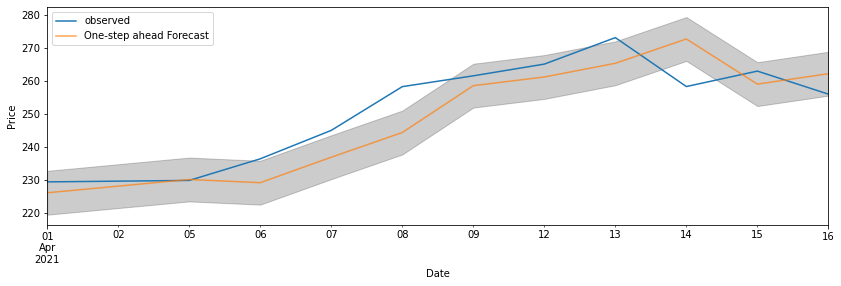

In [162]:
pred = res.get_prediction(start=pd.to_datetime('2021-04-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = sqdf[square]['2021-04-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

In [163]:
pred_uc = res.get_forecast(steps=120)
pred_uc.predicted_mean
# pred_ci = pred_uc.conf_int()

# ax = sqdf[square]['2021-04-01':].plot(label='observed', figsize=(14, 4))
# pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.25)
# ax.set_xlabel('Date')
# ax.set_ylabel('Sales')
# plt.legend()
# plt.show()

2021-02-12    256.997965
2021-02-15    256.141735
2021-02-16    256.958176
2021-02-17    256.179675
2021-02-18    256.921999
                 ...    
2021-07-23    256.557824
2021-07-26    256.561422
2021-07-27    256.557992
2021-07-28    256.561263
2021-07-29    256.558144
Freq: B, Name: predicted_mean, Length: 120, dtype: float64

In [164]:
pred_uc.head()

AttributeError: 'PredictionResults' object has no attribute 'head'